In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ASUS/Machine_Learning/100_Days_Of _Machine_Learning/Feature_Engineering/Datasets/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


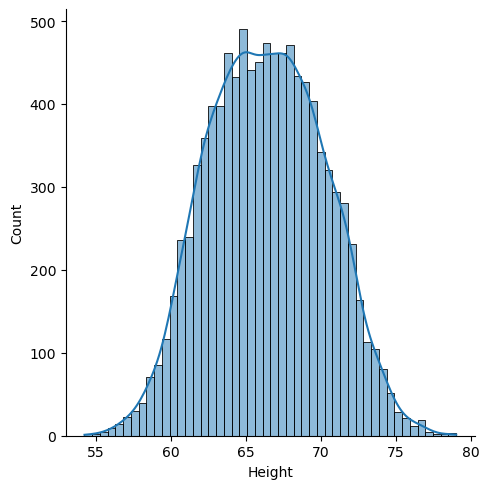

In [8]:
sns.displot(df.Height,kde = True)

<Axes: xlabel='Height'>

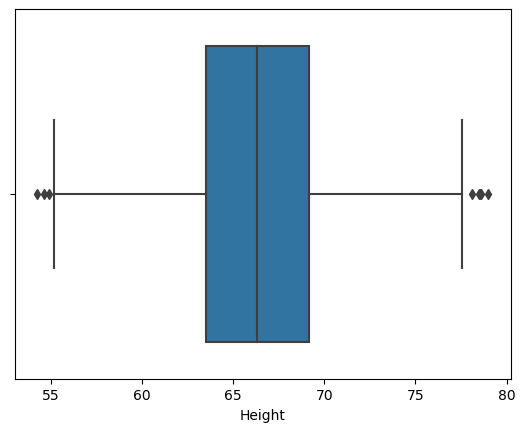

In [10]:
sns.boxplot(data = df,x= df.Height)

In [11]:
upper_b = df.Height.quantile(0.99)
upper_b

74.7857900583366

In [12]:
lower_b = df.Height.quantile(0.01)
lower_b

58.13441158671655

In [13]:
df[(df.Height <=lower_b) | (df.Height >= upper_b)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [14]:
# Trimming

new_df = df[(df.Height >=lower_b) & (df.Height <= upper_b)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height'>

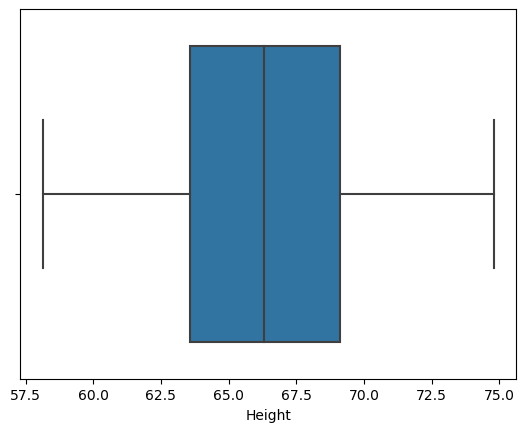

In [15]:
sns.boxplot(data = new_df,x = new_df.Height)

In [18]:
# Capping (Winsorization)

df.Height = np.where(df.Height >= upper_b,upper_b,np.where(df.Height <= lower_b,lower_b,df.Height))

<Axes: xlabel='Height'>

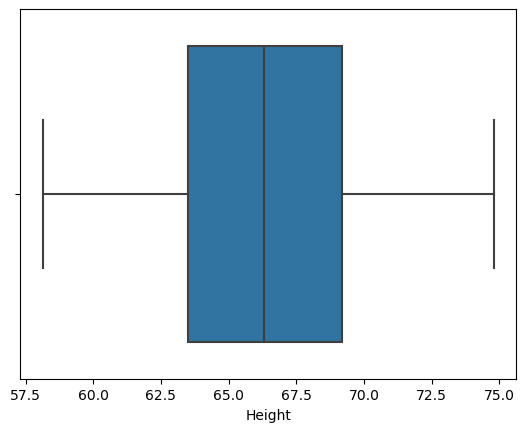

In [19]:
sns.boxplot(data = df,x = df.Height)

# So we can see that, outliers are capped